<a href="https://colab.research.google.com/github/josejulianhidayat/Data_Mining/blob/main/312210695_JoseJulianHidayat_DM_P12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS DATA MINING PERTEMUAN 12

NAMA  = JOSE JULIAN HIDAYAT

NIM   = 312210695

KELAS = TI.22.C8

PRODI = TEKNIK INFORMATIKA - UNIVERSITAS PELITA BANGSA

DOSEN = Asep Muhidin,S.Kom.,M.Kom.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Load Data
url = "https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/titanic.csv"
df = pd.read_csv(url)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# 2. Preprocessing
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [4]:
# Identifikasi kolom
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [5]:
# Pipeline preprocessing numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [6]:
# Pipeline preprocessing kategorikal
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:
# Gabungkan preprocessing
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [8]:
# Gabungkan pipeline preprocessing + model
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])


In [10]:
# 4. GridSearchCV
param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [4, 6, 8],
    'clf__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [4, 6, 8],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [50, 100]},
             scoring='accuracy')

In [11]:

# 5. Evaluasi
print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X)
print("\nClassification Report:")
print(classification_report(y, y_pred))

Best Parameters: {'clf__max_depth': 8, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       549
           1       0.94      0.54      0.69       342

    accuracy                           0.81       891
   macro avg       0.86      0.76      0.78       891
weighted avg       0.84      0.81      0.80       891



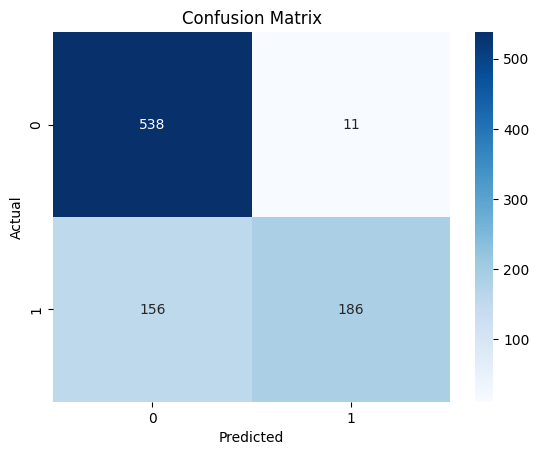

In [12]:

# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
print("Training Score:", grid_search.best_estimator_.score(X, y))
print("Cross-Validation Score:", grid_search.best_score_)


Training Score: 0.8125701459034792
Cross-Validation Score: 0.7655137781683511


# HASIL ANALISA

Model yang dibangun menggunakan RandomForestClassifier dan pendekatan Pipeline dan GridSearchCV menunjukkan hasil yang cukup baik dalam memprediksi keselamatan penumpang Titanic.  Hasil GridSearchCV menunjukkan bahwa kombinasi hyperparameter terbaik berada pada nilai maksimum kedalaman pohon (max_depth) 8, jumlah estimator pohon (n_estimators) 50, dan nilai minimum pemisahan sampel (min_samples_split) 5.  Dengan akurasi training 81,26% dan skor validasi silang 76,55%, model ini tampaknya stabil dan tidak terlalu overfitting.

Berdasarkan laporan klasifikasi dan confusion matrix, model menunjukkan presisi yang tinggi pada kelas penumpang yang selamat (kelas 1), dengan skor 0,94. Namun, recall model tetap rendah, yaitu 0,54, yang menunjukkan bahwa model masih banyak salah dalam mengklasifikasikan penumpang yang seharusnya selamat sebagai tidak selamat.  Akurasi total model adalah 0,81, dan nilai F1-kelas selamat adalah 0,69.  Ini menunjukkan bahwa model cenderung lebih "konservatif" dalam memprediksi penumpang yang selamat, menghasilkan banyak false negative.

Penggunaan Pipeline sangat membantu dalam menjaga konsistensi preprocessing dan meminimalkan risiko data leakage, karena seluruh proses – mulai dari imputasi, encoding, hingga pelatihan model – digabungkan dalam satu alur yang terstruktur. Sementara itu, GridSearchCV sangat efektif dalam melakukan tuning hyperparameter karena memungkinkan pencarian kombinasi parameter yang optimal secara sistematis melalui validasi silang. Secara keseluruhan, penerapan Pipeline dan GridSearchCV terbukti memberikan alur kerja machine learning yang efisien, bersih, dan dapat direproduksi, serta berkontribusi besar terhadap peningkatan performa model.